<a href="https://colab.research.google.com/github/salil82/Module-B-semester-2/blob/main/OMDS-ModB2-Week2-Deshpande-Salil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Who: Policymakers and the general public. With policymakers, my data story might focus on CO2 emission trends in specific countries or regions to highlight policy needs. With the general public, I might focus on the impact of CO2 emissions and climate change on daily life.

What: I want my audience to know that CO2 emissions are increasing at a rapid pace and that we need to take immediate action to reduce them.

How: I could use line charts to show trends and bar charts for comparisons. For policymakers, interactive dashboards focusing on specific regions, and for the general public, simplified infographics highlighting the daily life impact of CO2 emissions.


# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [2]:
co2_df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/refs/heads/master/owid-co2-data.csv')
co2_df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50411 entries, 0 to 50410
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50411 non-null  object 
 1   year                                       50411 non-null  int64  
 2   iso_code                                   42480 non-null  object 
 3   population                                 41167 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 29173 non-null  float64
 6   cement_co2_per_capita                      25648 non-null  float64
 7   co2                                        29384 non-null  float64
 8   co2_growth_abs                             27216 non-null  float64
 9   co2_growth_prct                            26239 non-null  float64
 10  co2_including_luc     

In [4]:
co2_df.describe()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,50411.000000,4.116700e+04,1.525100e+04,29173.000000,25648.000000,29384.000000,27216.000000,26239.000000,23796.000000,23496.000000,...,2170.000000,41238.000000,38280.000000,41238.000000,41238.000000,38280.000000,38150.000000,37813.000000,4712.000000,4712.000000
mean,1920.349249,6.017453e+07,3.300495e+11,7.890109,0.060013,420.227035,6.268847,42.598225,544.144592,7.483698,...,7.190616,2.272236,0.002871,0.008014,0.011224,0.000509,490.799608,310.521459,-6.986781,21.468641
std,65.859123,3.308433e+08,3.086383e+12,62.988171,0.123562,1972.092032,62.199548,1721.913018,2273.281696,99.512520,...,17.448980,9.282343,0.015362,0.045687,0.062888,0.003048,2414.076755,1812.363570,259.018184,62.637598
min,1750.000000,2.150000e+02,4.998000e+07,0.000000,0.000000,0.000000,-1928.339000,-100.000000,-84.560000,-2298.978000,...,0.000000,-0.824000,-0.001000,0.000000,-0.001000,0.000000,-19.725000,0.000000,-2177.807000,-98.281000
25%,1875.000000,3.272140e+05,7.874038e+09,0.000000,0.000000,0.381000,-0.005000,-1.070500,6.667750,-0.727500,...,0.144000,0.003000,0.000000,0.000000,0.000000,0.000000,1.502000,0.221000,-2.262250,-6.828750
50%,1925.000000,2.291594e+06,2.743861e+10,0.000000,0.001000,5.081000,0.044000,3.813000,28.120000,0.112000,...,0.588500,0.081000,0.000000,0.000000,0.000000,0.000000,14.605500,2.222000,1.641000,8.381500
75%,1975.000000,9.986553e+06,1.212627e+11,0.524000,0.076250,53.656500,1.018000,10.884000,124.303250,2.765250,...,2.416500,0.373000,0.000000,0.001000,0.002000,0.000000,76.508500,27.863000,11.425500,32.782250
max,2024.000000,8.161973e+09,1.301126e+14,1666.885000,2.484000,38598.578000,1804.657000,180870.000000,43184.086000,2614.874000,...,100.000000,100.000000,0.377000,1.216000,1.678000,0.085000,54433.398000,43714.777000,1768.846000,1023.042000


In [5]:
co2_df.duplicated().sum()

np.int64(0)

In [6]:
co2_df.duplicated(subset=['country']).sum()

np.int64(50157)

In [7]:
#checking if there are any duplicates for the same country in the same year, which would be inappopriate.

duplicate_country_year = co2_df.duplicated(subset=['country', 'year']).sum()
print(f"Number of duplicate 'country' and 'year' combinations: {duplicate_country_year}")

if duplicate_country_year > 0:
    print("Displaying the first 5 duplicate entries:")
    display(co2_df[co2_df.duplicated(subset=['country', 'year'], keep=False)].sort_values(by=['country', 'year']).head())

Number of duplicate 'country' and 'year' combinations: 0


In [8]:
print("--- Mean, Median, and Mode for Numerical Columns ---")

for column in co2_df.select_dtypes(include=['number']).columns:
    mean_val = co2_df[column].mean()
    median_val = co2_df[column].median()
    mode_val = co2_df[column].mode().tolist() # .mode() can return multiple values, convert to list

    print(f"\nColumn: {column}")
    print(f"  Mean: {mean_val:.2f}")
    print(f"  Median: {median_val:.2f}")
    # Display mode only if it has values
    if mode_val:
        print(f"  Mode: {mode_val}")
    else:
        print("  Mode: No unique mode or all values are unique")

--- Mean, Median, and Mode for Numerical Columns ---

Column: year
  Mean: 1920.35
  Median: 1925.00
  Mode: [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

Column: population
  Mean: 60174525.17
  Median: 2291594.00
  Mode: [905.0]

Column: gdp
  Mean: 330049485119.51
  Median: 27438613750.00
  Mode: [76320000.0, 632592000.0]

Column: cement_co2
  Mean: 7.89
  Median: 0.00
  Mode: [0.0]

Column: cement_co2_per_capita
  Mean: 0.06
  Median: 0.00
  Mode: [0.0]

Column: co2
  Mean: 420.23
  Median: 5.08
  Mode: [0.0]

Column: co2_growth_abs
  Mean: 6.27
  Median: 0.04
  Mode: [0.0]

Column: co2_growth_prct
  Mean: 42.60
  Median: 3.81
  Mode: [0.0]

Column: co2_including_luc
  Mean: 544.14
  Median: 28.12
  Mode: [0.004]

Column: co2_including_luc_growth_abs
  Mean: 7.48
  Median: 0.11
  Mode: [-0.0]

Column: co2_including_luc_growth_prct
  Mean: 4.1

In [9]:
missing_values = co2_df.isnull().sum()
print("Number of missing values per column:")
display(missing_values[missing_values > 0].sort_values(ascending=False))

Number of missing values per column:


,0
share_global_cumulative_other_co2,48241
share_global_other_co2,48241
other_co2_per_capita,47752
cumulative_other_co2,47157
other_industry_co2,47157
...,...
population,9244
temperature_change_from_ghg,9173
share_of_temperature_change_from_ghg,9173
temperature_change_from_co2,9173


Many columns have a significant number of missing values. For instance, share_global_cumulative_other_co2, share_global_other_co2, other_co2_per_capita, cumulative_other_co2, and other_industry_co2 each have over 47,000 missing entries out of 50,411 total rows. Also, iso_code, population, and temperature_change_from_ghg have thousands of missing values as well.

Columns like `share_global_cumulative_other_co2` with over 47,000 missing values out of 50,411 might be candidates for removal, as imputation would be highly speculative. For columns with fewer missing values like `population` or `iso_code`, imputation (e.g., using the median for `population` or a specific 'Unknown' category for `iso_code` if appropriate) could be considered.

In [10]:
print("--- Checking for Inconsistent Data (e.g., negative values where inappropriate) ---")

# Columns that should logically not be negative
columns_to_check = [
    'population', 'gdp',
    'cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2',
    'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy',
    'cement_co2_per_capita', 'coal_co2_per_capita', 'flaring_co2_per_capita',
    'gas_co2_per_capita', 'oil_co2_per_capita', 'other_co2_per_capita',
    'cumulative_cement_co2', 'cumulative_co2', 'cumulative_coal_co2', 'cumulative_flaring_co2',
    'cumulative_gas_co2', 'cumulative_oil_co2', 'cumulative_other_co2',
    'energy_per_capita', 'primary_energy_consumption'
]

inconsistent_data_found = False

for col in columns_to_check:
    if col in co2_df.columns:
        negative_count = (co2_df[col] < 0).sum()
        if negative_count > 0:
            print(f"Column '{col}': Found {negative_count} negative value(s). Minimum value: {co2_df[col].min():.2f}")
            inconsistent_data_found = True

# Special case for 'year' - check if any year is before a reasonable starting point (e.g., 0 or negative)
if 'year' in co2_df.columns:
    if (co2_df['year'] < 0).sum() > 0:
        print(f"Column 'year': Found {(co2_df['year'] < 0).sum()} negative year value(s).")
        inconsistent_data_found = True

if not inconsistent_data_found:
    print("No obvious negative inconsistencies found in selected numerical columns.")

print("----------------------------------------------------------------------------------")

--- Checking for Inconsistent Data (e.g., negative values where inappropriate) ---
No obvious negative inconsistencies found in selected numerical columns.
----------------------------------------------------------------------------------


In [11]:
print("--- Identifying Categorical Variables ---")
categorical_cols = co2_df.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    print(f"Found categorical columns: {list(categorical_cols)}")
    print("Applying one-hot encoding...")
    co2_df_encoded = pd.get_dummies(co2_df, columns=categorical_cols, drop_first=True)
    print("One-hot encoding applied successfully.")
    print("Shape of the original DataFrame:", co2_df.shape)
    print("Shape of the encoded DataFrame:", co2_df_encoded.shape)
    print("First 5 rows of the encoded DataFrame:")
    display(co2_df_encoded.head())
else:
    print("No categorical columns found in the DataFrame.")

--- Identifying Categorical Variables ---
Found categorical columns: ['country', 'iso_code']
Applying one-hot encoding...
One-hot encoding applied successfully.
Shape of the original DataFrame: (50411, 79)
Shape of the encoded DataFrame: (50411, 547)
First 5 rows of the encoded DataFrame:


,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,iso_code_VEN,iso_code_VGB,iso_code_VNM,iso_code_VUT,iso_code_WLF,iso_code_WSM,iso_code_YEM,iso_code_ZAF,iso_code_ZMB,iso_code_ZWE
0,1750,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,1751,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,1752,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,1753,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,1754,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


### Conclusions and Next Steps for Data Usability and Modification:

**Are the data usable?**

The data, `co2_df`, is generally **usable**, but it requires significant preprocessing due to the high number of missing values in many columns. The dataset contains a wealth of information, and its structure (country and year combinations) appears consistent without inappropriate duplicates.

**Do I need to modify or correct the data in some way?**

Based on the `missing_values` check, many columns have a very high percentage of missing data (e.g., `share_global_cumulative_other_co2` with over 47,000 missing entries out of 50,411). What's likely needed: handling missing values, encoding categorical variables, and taking a deeper dive into specific columns.

### Checking for Class Imbalance:

There are two main categorical columns: 'country' and 'iso_code'. See code below to examine their distributions.

In [12]:
print("\n--- Class Imbalance Check for Categorical Columns ---")

# Check 'country' column
print("\nDistribution of 'country' column:")
country_counts = co2_df['country'].value_counts()
display(country_counts.head(10)) # Display top 10 most frequent countries
display(country_counts.tail(10)) # Display 10 least frequent countries

# Check 'iso_code' column (if it still exists and is not entirely replaced by dummies)
# iso_code might have already been one-hot encoded and removed, so check existence first
if 'iso_code' in co2_df.columns:
    print("\nDistribution of 'iso_code' column:")
    iso_code_counts = co2_df['iso_code'].value_counts()
    display(iso_code_counts.head(10))
    display(iso_code_counts.tail(10))

# You can also visualize these distributions if needed, for example:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))
# country_counts.head(20).plot(kind='bar')
# plt.title('Top 20 Countries by Data Points')
# plt.ylabel('Count')
# plt.show()



--- Class Imbalance Check for Categorical Columns ---

Distribution of 'country' column:


,count
country,
Afghanistan,275
Africa,275
Andorra,275
Antarctica,275
Asia,275
Asia (excl. China and India),275
Bangladesh,275
Barbados,275
Bhutan,275


,count
country,
Christmas Island,174
Curacao,174
Saint Pierre and Miquelon,174
Montserrat,174
New Caledonia,174
Ryukyu Islands,174
Wallis and Futuna,174
Sint Maarten (Dutch part),174
Ryukyu Islands (GCP),52



Distribution of 'iso_code' column:


,count
iso_code,
AFG,275
AND,275
ATA,275
BGD,275
BOL,275
BTN,275
BHR,275
AUS,275
BRB,275


,count
iso_code,
BMU,174
CUW,174
FRO,174
PYF,174
CXR,174
MSR,174
NCL,174
SPM,174
SXM,174


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data (p. 1-17). Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

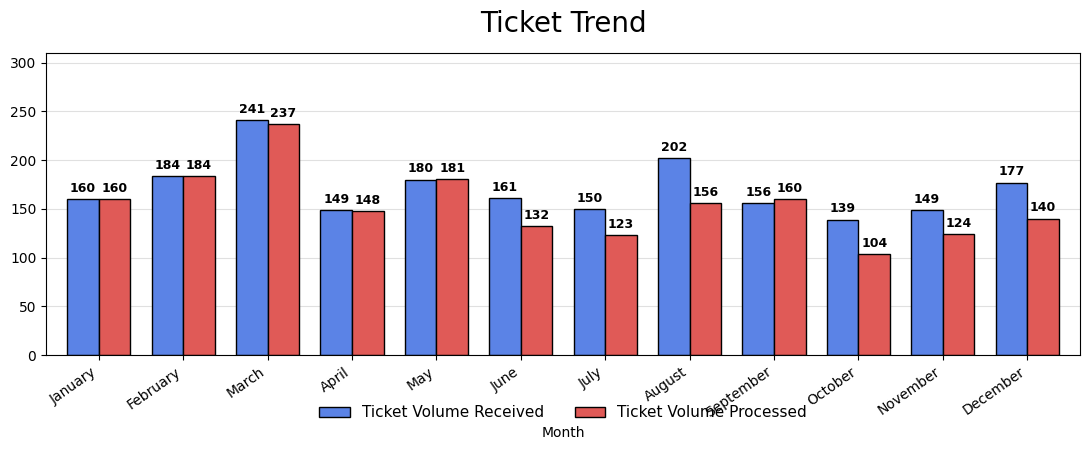

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]

df = pd.DataFrame({
    "Month": months,
    "Ticket Volume Received": [160, 184, 241, 149, 180, 161, 150, 202, 156, 139, 149, 177],
    "Ticket Volume Processed": [160, 184, 237, 148, 181, 132, 123, 156, 160, 104, 124, 140]
}).set_index("Month")

# Plot
ax = df.plot(kind="bar", figsize=(11, 5),
             color=["#5b83e6", "#e05a57"], edgecolor="black", width=0.75)

# Annotate bars
for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(x)}" for x in container.datavalues],
                 label_type='edge', padding=3, fontsize=9, weight='bold')

# Styling
ax.set_title("Ticket Trend", fontsize=20, pad=15)
ax.set_ylim(0, 310)
ax.set_xticklabels(df.index, rotation=35, ha='right', fontsize=10)
ax.yaxis.grid(True, linestyle='-', color='lightgray', alpha=0.7)
ax.set_axisbelow(True)

# Legend below plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, frameon=False, fontsize=11)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()